In [17]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
#for ipynb
%matplotlib inline
import yaml

In [18]:
#get list of files with data
in_dict = {'data':'../TFBS_nucleosome_profiling_unfiltered_30000sites_v2/results/'
          }

samples_yaml = '../TFBS_nucleosome_profiling_unfiltered_v2/config/samples.GC.yaml'
tfx_path = '../../metadata/delfi/analysis/Delfi_tumor_fraction_data.txt'
metadata_path = '../../../griffin_paper/data/delfi_metadata/analysis/matched_metadata_corrected.txt'

with open(samples_yaml, 'r') as f:
    samples = yaml.safe_load(f)
samples = samples['samples']
samples = list(samples.keys())  
    
in_files = {}
for group in in_dict.keys():
    in_dir = in_dict[group]
    in_files[group] = []
    for sample in samples:
        in_files[group].append(in_dir+'/'+sample+'/'+sample+'.uncorrected.coverage.tsv')
        in_files[group].append(in_dir+'/'+sample+'/'+sample+'.GC_map_corrected.coverage.tsv')
    print(group,len(in_files[group]))    

data 846


In [19]:
#get columns with coverage data
plot_columns = np.arange(-990,990,15)
str_plot_columns = [str(m) for m in plot_columns]

In [20]:
#import data
start_time = time.time()
data = pd.DataFrame()
for group in in_files.keys():
    for i,file in enumerate(in_files[group]):
        if i%100==0:
            print(i,'importing',file,np.round(time.time()-start_time))
        current = pd.read_csv(file,sep='\t')
        #current['site_group'] = group
        data = data.append(current, ignore_index=True)
        

0 importing ../TFBS_nucleosome_profiling_unfiltered_30000sites_v2/results//Bile_Duct_Cancer_CGPLPA114/Bile_Duct_Cancer_CGPLPA114.uncorrected.coverage.tsv 0.0
100 importing ../TFBS_nucleosome_profiling_unfiltered_30000sites_v2/results//Breast_Cancer_CGPLBR49/Breast_Cancer_CGPLBR49.uncorrected.coverage.tsv 2.0
200 importing ../TFBS_nucleosome_profiling_unfiltered_30000sites_v2/results//Colorectal_Cancer_CGCRC321/Colorectal_Cancer_CGCRC321.uncorrected.coverage.tsv 5.0
300 importing ../TFBS_nucleosome_profiling_unfiltered_30000sites_v2/results//Healthy_CGPLH210/Healthy_CGPLH210.uncorrected.coverage.tsv 9.0
400 importing ../TFBS_nucleosome_profiling_unfiltered_30000sites_v2/results//Healthy_CGPLH365/Healthy_CGPLH365.uncorrected.coverage.tsv 15.0
500 importing ../TFBS_nucleosome_profiling_unfiltered_30000sites_v2/results//Healthy_CGPLH425/Healthy_CGPLH425.uncorrected.coverage.tsv 22.0
600 importing ../TFBS_nucleosome_profiling_unfiltered_30000sites_v2/results//Healthy_CGPLH479/Healthy_CGPLH4

In [21]:
data.set_index('sample')

,-990,-975,-960,-945,-930,-915,-900,-885,-870,-855,...,mean_coverage,central_coverage,amplitude,outlier_cutoff,exclude_zero_mappability,correction,number_of_sites,site_name,smoothing,CNA_normalization
sample,,,,,,,,,,,,,,,,,,,,,
Bile_Duct_Cancer_CGPLPA114,0.98318,0.98204,0.97266,0.96728,0.97061,0.97238,0.97505,0.98196,0.98599,0.98778,...,0.96034,1.03405,0.48750,12.0,True,uncorrected,30000,AHR.hg38.30000,True,False
Bile_Duct_Cancer_CGPLPA114,0.99023,0.98631,0.98423,0.98531,0.98434,0.98540,0.98747,0.98894,0.99023,0.98993,...,1.00126,1.10372,0.25613,11.0,True,uncorrected,30000,AR.hg38.30000,True,False
Bile_Duct_Cancer_CGPLPA114,0.97924,0.97967,0.98077,0.97729,0.97380,0.97111,0.97219,0.96987,0.96860,0.97338,...,0.96156,1.02372,0.22100,10.0,True,uncorrected,30000,ARNT.hg38.30000,True,False
Bile_Duct_Cancer_CGPLPA114,0.97676,0.97519,0.97542,0.97343,0.97339,0.97308,0.97204,0.97602,0.97140,0.97366,...,0.99941,1.19137,0.44101,9.0,True,uncorrected,30000,ARNTL.hg38.30000,True,False
Bile_Duct_Cancer_CGPLPA114,0.98679,0.98986,0.99090,0.99628,0.99154,0.99151,0.99182,0.98561,0.98311,0.97756,...,0.98689,1.03443,0.34420,13.0,True,uncorrected,30000,ASCL1.hg38.30000,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pancreatic_Cancer_CGPLPA95,0.98757,0.98460,0.97881,0.97089,0.95968,0.96091,0.95711,0.96183,0.96676,0.97258,...,0.96000,0.98860,0.52871,8.0,True,GC_map_corrected,30000,ZNF467.hg38.30000,True,False
Pancreatic_Cancer_CGPLPA95,0.97332,0.96674,0.96043,0.95793,0.96019,0.95913,0.96422,0.96852,0.97685,0.98085,...,0.97643,1.02342,0.43986,10.0,True,GC_map_corrected,30000,ZNF554.hg38.30000,True,False
Pancreatic_Cancer_CGPLPA95,0.96027,0.93378,0.91274,0.89918,0.90601,0.91661,0.93708,0.95836,0.98202,0.99116,...,0.91906,0.82651,3.29291,5.0,True,GC_map_corrected,30000,ZNF580.hg38.30000,True,False


In [22]:
#get the metadata
#get the metadata
metadata1 = pd.read_csv(metadata_path, sep='\t')
metadata1 = metadata1[['new_sample_name','Stage','Age at Diagnosis', 'Gender']].set_index('new_sample_name') 
metadata2 = pd.read_csv(tfx_path, sep='\t')
metadata2 = metadata2[['sample','tumor_fraction','sample_type']].set_index('sample') 
metadata = metadata1.merge(metadata2, left_index = True, right_index=True)
metadata = metadata.reset_index()
metadata = metadata.rename(columns = {'index':'sample'})
metadata['status'] = np.where(metadata['sample_type'].str.contains('ancer'),1,0)
metadata['Stage'] = metadata['Stage'].str.strip(' ')

metadata_columns = ['sample','tumor_fraction','status','sample_type','Stage','Age at Diagnosis', 'Gender']
metadata = metadata[metadata_columns]
print("metadata:",len(metadata))


#merge with data
print(len(data))
data = data.merge(metadata, on = 'sample')
print(len(data))

metadata: 423
228420
228420


In [23]:
data

,-990,-975,-960,-945,-930,-915,-900,-885,-870,-855,...,site_name,smoothing,CNA_normalization,sample,tumor_fraction,status,sample_type,Stage,Age at Diagnosis,Gender
0,0.98318,0.98204,0.97266,0.96728,0.97061,0.97238,0.97505,0.98196,0.98599,0.98778,...,AHR.hg38.30000,True,False,Bile_Duct_Cancer_CGPLPA114,0.02606,1,Bile_Duct_Cancer,II,NaN,F
1,0.99023,0.98631,0.98423,0.98531,0.98434,0.98540,0.98747,0.98894,0.99023,0.98993,...,AR.hg38.30000,True,False,Bile_Duct_Cancer_CGPLPA114,0.02606,1,Bile_Duct_Cancer,II,NaN,F
2,0.97924,0.97967,0.98077,0.97729,0.97380,0.97111,0.97219,0.96987,0.96860,0.97338,...,ARNT.hg38.30000,True,False,Bile_Duct_Cancer_CGPLPA114,0.02606,1,Bile_Duct_Cancer,II,NaN,F
3,0.97676,0.97519,0.97542,0.97343,0.97339,0.97308,0.97204,0.97602,0.97140,0.97366,...,ARNTL.hg38.30000,True,False,Bile_Duct_Cancer_CGPLPA114,0.02606,1,Bile_Duct_Cancer,II,NaN,F
4,0.98679,0.98986,0.99090,0.99628,0.99154,0.99151,0.99182,0.98561,0.98311,0.97756,...,ASCL1.hg38.30000,True,False,Bile_Duct_Cancer_CGPLPA114,0.02606,1,Bile_Duct_Cancer,II,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228415,0.98757,0.98460,0.97881,0.97089,0.95968,0.96091,0.95711,0.96183,0.96676,0.97258,...,ZNF467.hg38.30000,True,False,Pancreatic_Cancer_CGPLPA95,0.04484,1,Pancreatic_Cancer,II,64.0,F
228416,0.97332,0.96674,0.96043,0.95793,0.96019,0.95913,0.96422,0.96852,0.97685,0.98085,...,ZNF554.hg38.30000,True,False,Pancreatic_Cancer_CGPLPA95,0.04484,1,Pancreatic_Cancer,II,64.0,F
228417,0.96027,0.93378,0.91274,0.89918,0.90601,0.91661,0.93708,0.95836,0.98202,0.99116,...,ZNF580.hg38.30000,True,False,Pancreatic_Cancer_CGPLPA95,0.04484,1,Pancreatic_Cancer,II,64.0,F
228418,1.00059,0.99958,0.99771,1.00106,0.99640,0.99171,0.99643,0.99192,0.99100,0.98534,...,ZNF770.hg38.30000,True,False,Pancreatic_Cancer_CGPLPA95,0.04484,1,Pancreatic_Cancer,II,64.0,F


In [24]:
print(len(data['site_name'].unique()))
print(len(data['sample'].unique()))
print(len(data))
print(len(data['site_name'].unique())*len(data['sample'].unique())*len(data['correction'].unique()))


270
423
228420
228420


In [25]:
data['number_of_sites'].unique()

array([30000])

In [26]:
data['Stage'].unique()

array(['II', 'IV', 'I', 'III', 'X', '0', nan], dtype=object)

In [27]:
#get the key columns
data = data[metadata_columns+['site_name','correction',
                              'central_coverage','amplitude','mean_coverage']+str_plot_columns]
print(len(data))

site_groups = in_dict.keys()

site_names = data['site_name'].unique()

for group,df in data.groupby('correction'):
    print(group,len(df['site_name'].unique()))

    #df.to_csv('merged_data/'+group+'_data_with_features.txt', sep='\t', index=False)
    
    #reformat for logistic regression
    reformatted = df[metadata_columns+['site_name','correction','central_coverage','amplitude','mean_coverage']]
    reformatted = reformatted.set_index(metadata_columns+['correction','site_name']).unstack()
    new_column_names = []
    for item in reformatted.columns.values:
        new_column_names.append('_'.join(item))
    reformatted.columns = new_column_names
    group = group.replace("_",'-') #rename group
    reformatted.to_csv('merged_data/'+group+'_reformatted.txt', sep='\t')
    print(reformatted.shape)
    

228420
GC_map_corrected 270
(423, 810)
uncorrected 270
(423, 810)


In [28]:
810/3

270.0

In [29]:
reformatted

,,,,,,,,central_coverage_AHR.hg38.30000,central_coverage_AR.hg38.30000,central_coverage_ARNT.hg38.30000,central_coverage_ARNTL.hg38.30000,central_coverage_ASCL1.hg38.30000,central_coverage_ASCL2.hg38.30000,central_coverage_ATF1.hg38.30000,central_coverage_ATF2.hg38.30000,central_coverage_ATF3.hg38.30000,central_coverage_ATF4.hg38.30000,...,mean_coverage_ZNF317.hg38.30000,mean_coverage_ZNF341.hg38.30000,mean_coverage_ZNF35.hg38.30000,mean_coverage_ZNF384.hg38.30000,mean_coverage_ZNF449.hg38.30000,mean_coverage_ZNF467.hg38.30000,mean_coverage_ZNF554.hg38.30000,mean_coverage_ZNF580.hg38.30000,mean_coverage_ZNF770.hg38.30000,mean_coverage_ZSCAN16.hg38.30000
sample,tumor_fraction,status,sample_type,Stage,Age at Diagnosis,Gender,correction,,,,,,,,,,,,,,,,,,,,,
Bile_Duct_Cancer_CGPLPA114,0.02606,1,Bile_Duct_Cancer,II,NaN,F,uncorrected,1.03405,1.10372,1.02372,1.19137,1.03443,1.07561,0.79260,1.07257,0.97600,1.05089,...,1.01037,0.91791,0.95108,0.93248,0.99313,0.93389,0.97308,0.90610,0.96962,0.92686
Bile_Duct_Cancer_CGPLPA115,0.05922,1,Bile_Duct_Cancer,IV,NaN,M,uncorrected,1.05207,1.10641,1.04517,1.27244,1.08742,1.11219,0.84490,1.06398,0.99381,1.05773,...,1.00672,0.93934,0.95884,0.93255,0.99351,0.95332,0.98443,0.93249,0.97106,0.92514
Bile_Duct_Cancer_CGPLPA117,0.00000,1,Bile_Duct_Cancer,II,NaN,M,uncorrected,0.95940,1.10087,0.96661,1.04719,0.95377,1.02173,0.72341,1.05066,0.91334,1.05927,...,1.01464,0.88852,0.95647,0.94217,0.99549,0.90814,0.96209,0.89018,0.96816,0.93521
Bile_Duct_Cancer_CGPLPA118,0.02789,1,Bile_Duct_Cancer,I,68.0,F,uncorrected,1.01252,1.12764,0.99953,1.12821,0.99744,1.05862,0.75265,1.08792,0.96916,1.08427,...,1.01523,0.88688,0.94966,0.92779,0.99561,0.90588,0.96481,0.88007,0.96311,0.93048
Bile_Duct_Cancer_CGPLPA122,0.04373,1,Bile_Duct_Cancer,II,62.0,F,uncorrected,1.00570,1.09405,1.01600,1.16756,1.02752,1.04188,0.71265,1.07199,0.96020,1.06036,...,1.01104,0.89816,0.94411,0.92695,0.99113,0.91173,0.96587,0.87848,0.96303,0.93125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pancreatic_Cancer_CGPLPA86,0.02980,1,Pancreatic_Cancer,II,66.0,M,uncorrected,0.98935,1.08457,1.00441,1.13579,0.97566,1.03151,0.71858,1.05372,0.94191,1.04789,...,1.01327,0.89468,0.94207,0.93426,0.99400,0.91032,0.96035,0.87290,0.96289,0.92602
Pancreatic_Cancer_CGPLPA92,0.02493,1,Pancreatic_Cancer,II,72.0,M,uncorrected,0.95753,1.08994,0.96708,1.04546,0.94925,0.99633,0.72283,1.05706,0.90054,1.05810,...,1.01196,0.89028,0.95457,0.94363,0.99207,0.91261,0.96228,0.88916,0.96834,0.93250
Pancreatic_Cancer_CGPLPA93,0.05063,1,Pancreatic_Cancer,II,48.0,M,uncorrected,1.02495,1.08147,1.01865,1.20438,1.06897,1.06172,0.74747,1.05600,0.93591,1.02280,...,1.00253,0.91631,0.94167,0.92916,0.99164,0.93129,0.96742,0.89492,0.96708,0.92253


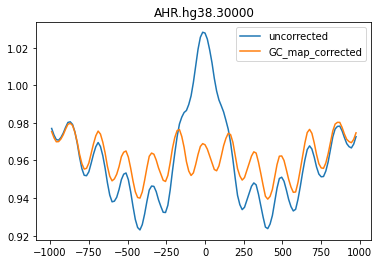

In [30]:
#plot
for site_name in data['site_name'].unique():
    for site_group in data['correction'].unique():
        current = data[(data['site_name']==site_name) & (data['correction']==site_group)][str_plot_columns].mean()
        plt.plot(plot_columns,current, label=site_group)
    plt.title(site_name)
    plt.legend()
    break




fft real -0.23882197576219194
fft imag -0.0764617529870114
fft magn 0.2507635056717858
sum x coords -0.23882197576220476
sum y coords -0.07646175298703417
magnitude: 0.25076350567180494


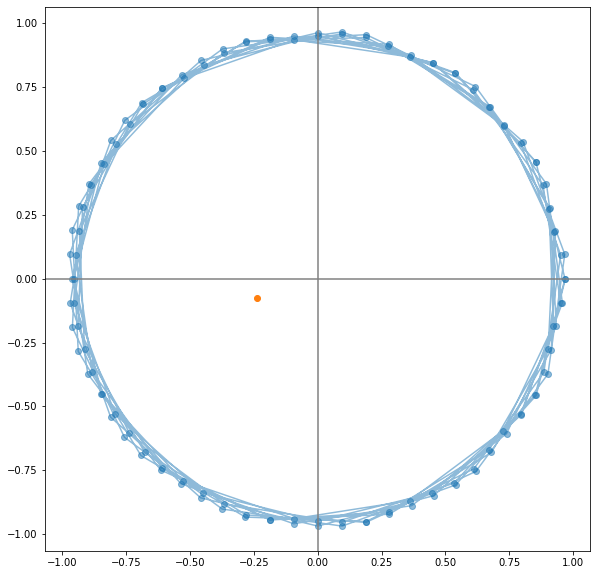

In [31]:
fft_columns = np.arange(-960,960,15)
str_fft_columns = [str(m) for m in fft_columns]

#plot out what the fft is doing for a given frequency
demo_res = np.fft.fft(current[str_fft_columns])
demo_signal = current[str_fft_columns]

frequency = 10
print('fft real', demo_res[frequency].real)
print('fft imag', demo_res[frequency].imag)
print('fft magn',np.abs(demo_res[frequency]))

#get angles for rotation
angles = np.linspace(0,2*np.pi,len(demo_signal)+1)
angles = -angles[0:-1]

#wrapped at frequency
heights = np.sin(angles*frequency)*demo_signal
widths = np.cos(angles*frequency)*demo_signal
fig,ax = plt.subplots(figsize = (10,10))
ax.plot(widths,heights, alpha = 0.5)
ax.scatter(widths,heights, alpha = 0.5)
ax.set_aspect('equal')
ax.scatter(sum(widths),sum(heights))
ax.axvline(0, color = 'grey')
ax.axhline(0, color = 'grey')
print('sum x coords',sum(widths))
print('sum y coords',sum(heights))
print('magnitude:',np.sqrt(sum(widths)**2+sum(heights)**2))

In [32]:
# from scipy.signal import find_peaks
# plt.plot(fft_columns,current)
# peaks =  [fft_columns[m] for m in find_peaks(current)[0]]
# plt.scatter(peaks,[.99 for m in peaks])
# print(peaks)

# spacing = []
# for i in range(len(peaks)-1):
#     spacing.append(peaks[i+1]-peaks[i])
# np.mean(spacing)